In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
#choose starting date
start_date = '2020-01-01'
end_date= '2022-01-01'
#if using a current date as end date
#end_date=date.today().strftime("%Y-%m-%d")
symbol =['AMD','GOOGL','WST','DXCM','NVDA','AAPL','AMZN','NFLX','TSLA','MSFT']#stock portfolio
df = yf.download(symbol, start=start_date, end = end_date)['Close'] #getting only Closing price values 
df.head()

[*********************100%%**********************]  10 of 10 completed


,AAPL,AMD,AMZN,DXCM,GOOGL,MSFT,NFLX,NVDA,TSLA,WST
Date,,,,,,,,,,
2020-01-02,75.087502,49.099998,94.900497,54.845001,68.433998,160.619995,329.809998,59.977501,28.684000,151.740005
2020-01-03,74.357498,48.599998,93.748497,54.674999,68.075996,158.619995,325.899994,59.017502,29.534000,152.139999
2020-01-06,74.949997,48.389999,95.143997,56.497501,69.890503,159.029999,335.829987,59.264999,30.102667,152.220001
2020-01-07,74.597504,48.250000,95.343002,57.862499,69.755501,157.580002,330.750000,59.982498,31.270666,151.830002
2020-01-08,75.797501,47.830002,94.598503,58.307499,70.251999,160.089996,339.260010,60.095001,32.809334,149.779999


In [3]:
# Get the AMD timeseries.
AMD = df.loc[:, 'AMD']
# Calculate the 50 and 200 days moving averages of the closing prices
short_rolling_AMD= AMD.rolling(window=50, min_periods=1).mean()#min_periods calculate the arithmetic average starting from 1st numb 
long_rolling_AMD = AMD.rolling(window=200, min_periods=1).mean()

In [5]:
AMD

Date
2020-01-02     49.099998
2020-01-03     48.599998
2020-01-06     48.389999
2020-01-07     48.250000
2020-01-08     47.830002
                 ...    
2021-12-27    154.360001
2021-12-28    153.149994
2021-12-29    148.259995
2021-12-30    145.149994
2021-12-31    143.899994
Name: AMD, Length: 505, dtype: float64

In [7]:
long_rolling_AMD

Date
2020-01-02     49.099998
2020-01-03     48.849998
2020-01-06     48.696665
2020-01-07     48.584999
2020-01-08     48.434000
                 ...    
2021-12-27    103.357800
2021-12-28    103.711050
2021-12-29    104.038600
2021-12-30    104.351200
2021-12-31    104.680100
Name: AMD, Length: 505, dtype: float64

In [8]:
#creating df for AMD stock
AMD=pd.DataFrame ({'Close':df['AMD'],'50_MA':short_rolling_AMD,'200_MA':long_rolling_AMD})
#generate signals
AMD['Signal']=np.where(AMD['50_MA']> AMD['200_MA'], 1, 0)
#generate trading orders
AMD['Position']=AMD['Signal'].diff()
#calculating trading
AMD['Trade'] = np.where(AMD['50_MA']> AMD['200_MA'], 1, -1)
#to calculate instantaneous rate of return (daily log returns)
AMD['Return'] = np.log(AMD.Close).diff()
#calculating trading system return
AMD['Treturn']=AMD.Return*AMD.Trade
AMD.head(100)

,Close,50_MA,200_MA,Signal,Position,Trade,Return,Treturn
Date,,,,,,,,
2020-01-02,49.099998,49.099998,49.099998,0,NaN,-1,NaN,NaN
2020-01-03,48.599998,48.849998,48.849998,0,0.0,-1,-0.010236,0.010236
2020-01-06,48.389999,48.696665,48.696665,0,0.0,-1,-0.004330,0.004330
2020-01-07,48.250000,48.584999,48.584999,0,0.0,-1,-0.002897,0.002897
2020-01-08,47.830002,48.434000,48.434000,0,0.0,-1,-0.008743,0.008743
...,...,...,...,...,...,...,...,...
2020-05-19,55.470001,49.575200,49.711979,0,0.0,-1,0.015992,-0.015992
2020-05-20,56.389999,49.795400,49.780825,1,1.0,1,0.016449,0.016449
2020-05-21,54.650002,49.974400,49.830510,1,0.0,1,-0.031343,-0.031343


In [12]:
np.log(49.099998)-np.log(48.599998)

0.010235504313092392

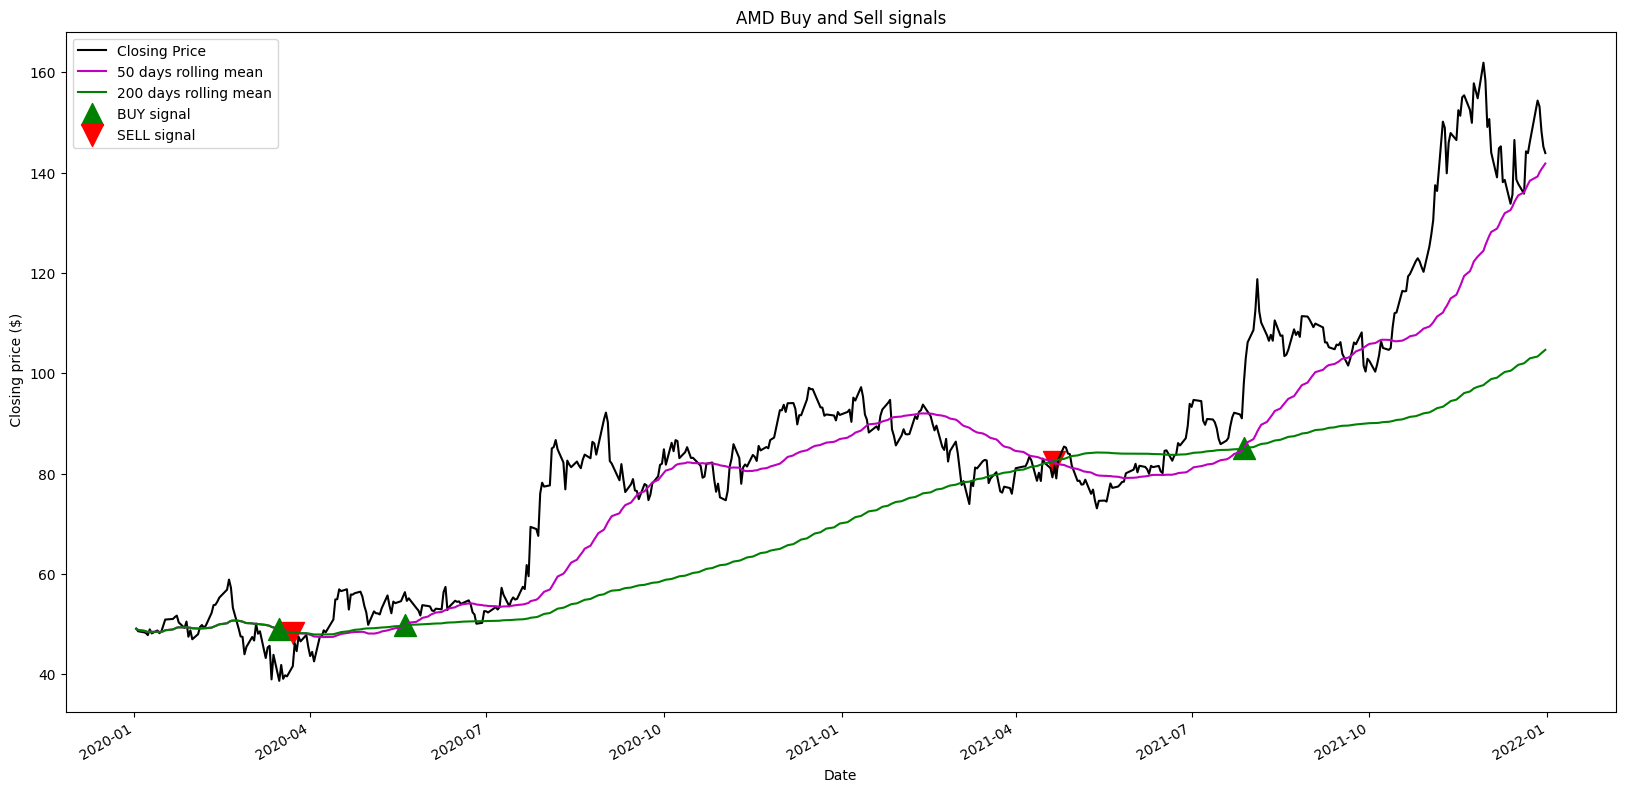

In [13]:
# Plot moving averages 
# plot closing price, short term moving averages and long term moving averages 
plt.figure(figsize=(20,10))
AMD['Close'].plot(color = 'k', label= 'Closing Price') 
AMD['50_MA'].plot(color = 'm',label = '50 days rolling mean') 
AMD['200_MA'].plot(color = 'g', label = '200 days rolling mean')
# plot ‘buy’ signals
plt.scatter(AMD.loc[AMD['Position'] == 1].index, 
         AMD['50_MA'][AMD['Position'] == 1], 
         marker='^', s=250,color = 'g', label = 'BUY signal')
# plot ‘sell’ signals
plt.scatter(AMD.loc[AMD['Position'] == -1].index, 
         AMD['50_MA'][AMD['Position'] == -1], 
         marker='v',s=250, color = 'r', label = 'SELL signal')
plt.title('AMD Buy and Sell signals')
plt.xlabel('Date')
plt.ylabel(' Closing price ($)')
plt.savefig('AMD buying and selling signals.png')
#plt.show()
plt.legend();

In [14]:
#trading system return
total_treturn=np.exp(AMD.Treturn.sum())#total return of moving averages trading system
#Buy and hold return 
hold_return=np.exp(AMD.Return.sum())#total return of buy and hold strategy
print("AMD Trading System total return: {:>10.2%}".format(total_treturn))
print("AMD Hold strategy return: {:>10.2%}".format(hold_return))


AMD Trading System total return:    141.76%
AMD Hold strategy return:    293.08%


In [15]:
AMD.Treturn.sum()

0.3489685982491424

In [17]:
AMD.Treturn.sum()

0.3489685982491424

In [22]:
#trading system return
total_treturn=np.exp(AMD.Treturn.sum())#total return of moving averages trading system
#Buy and hold return 
hold_return=np.exp(AMD.Return.sum())#total return of buy and hold strategy
print("AMD Trading System total return: {:>10.2%}".format(total_treturn))
print("AMD Hold strategy return: {:>10.2%}".format(hold_return))

AMD Trading System total return:    141.76%
AMD Hold strategy return:    293.08%


In [24]:
AMD.Treturn

Date
2020-01-02         NaN
2020-01-03    0.010236
2020-01-06    0.004330
2020-01-07    0.002897
2020-01-08    0.008743
                ...   
2021-12-27    0.054722
2021-12-28   -0.007870
2021-12-29   -0.032450
2021-12-30   -0.021200
2021-12-31   -0.008649
Name: Treturn, Length: 505, dtype: float64

In [25]:
initial_portfolio_value = 10000  # 100 shares of $100 each
# 0 means hold, 1 means invest
regime_array = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]

import numpy as np
from scipy.stats import norm

# Simulate random stock prices (simplified)
T = len(regime_array)  # number of time periods
mu = 0.01  # expected return per period
sigma = 0.02  # expected volatility per period
S0 = 100  # initial stock price
np.random.seed(0)

stock_prices = [S0]
for _ in range(1, T):
    new_price = stock_prices[-1] * np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.normal())
    stock_prices.append(new_price)

# Parameters for Black-Scholes option pricing
K = 95  # strike price
r = 0.001  # risk-free rate

# Initialize portfolio
cash = 10000
put_option_price = 0
portfolio_value = [cash]

# Tail-hedging strategy
for t in range(1, T):
    price_now = stock_prices[t]
    
    if regime_array[t] == 1:  # Invest regime
        # Calculate the Black-Scholes price for a put option
        d1 = (np.log(price_now / K) + (r + 0.5 * sigma ** 2)) / (sigma * np.sqrt(1))
        d2 = d1 - sigma * np.sqrt(1)
        put_option_price = K * np.exp(-r * 1) * norm.cdf(-d2) - price_now * norm.cdf(-d1)
        
        # Assume we buy the put option, reducing our cash
        cash -= put_option_price
        
        # Update portfolio value (simplified, assumes you are fully invested in the stock)
        portfolio_value.append(price_now * (cash / S0) + max(0, K - price_now) - put_option_price)
    else:  # Hold regime
        # We don't buy the put option, so our portfolio value is just our cash
        portfolio_value.append(cash)
        
    # Update cash as portfolio value (simplified)
    cash = portfolio_value[-1]

print(f"Final portfolio value: {portfolio_value[-1]}")

Final portfolio value: 24505.677502901024


In [29]:
max(df.Position)

nan

Initial Balance: $10000, Final Balance: $9142.186039635868


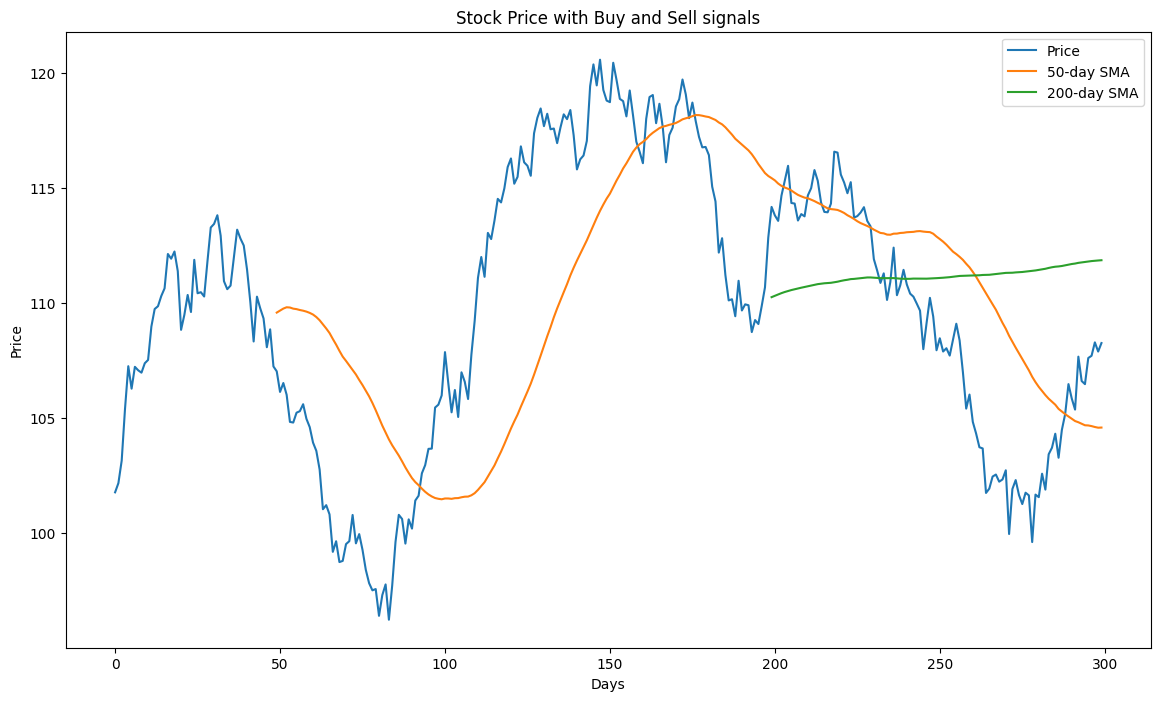

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random stock prices
np.random.seed(0)
n_days = 300
stock_price = np.random.normal(loc=0, scale=1, size=n_days).cumsum() + 100

# Create a DataFrame
df = pd.DataFrame({'price': stock_price})

# Calculate 50-day and 200-day SMA
df['SMA_50'] = df['price'].rolling(window=50).mean()
df['SMA_200'] = df['price'].rolling(window=200).mean()

# Create signals
df['Signal'] = 0.0
df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1.0, 0.0)

# Generate orders
df['Position'] = df['Signal'].diff()

# Backtest
initial_balance = 10000
cash = initial_balance
stock_quantity = 0

for i in range(1, len(df)):
    if df['Position'][i] == 1.0:
        stock_quantity = cash // df['price'][i]
        cash -= stock_quantity * df['price'][i]
    elif df['Position'][i] == -1.0:
        cash += stock_quantity * df['price'][i]
        stock_quantity = 0

# Final Portfolio Value
final_balance = cash + stock_quantity * df['price'].iloc[-1]
print(f"Initial Balance: ${initial_balance}, Final Balance: ${final_balance}")

# Plotting the stock price, SMA and signals
plt.figure(figsize=(14, 8))
plt.plot(df['price'], label='Price')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.plot(df['SMA_200'], label='200-day SMA')
# plt.scatter(df.index, df.loc[df['Position'] == 1.0]['price'], marker='^', color='g', label='Buy', alpha=1)
# plt.scatter(df.index, df.loc[df['Position'] == -1.0]['price'], marker='v', color='r', label='Sell', alpha=1)
plt.title('Stock Price with Buy and Sell signals')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()